In [71]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

### Learning Rate

In [72]:
path_3 = r"/home/docker/car_racing/models/DQN/DQN_1" # LR = 0.00001
path_4 = r"/home/docker/car_racing/models/DQN/DQN_2" # LR = 0.0001
path_5 = r"/home/docker/car_racing/models/DQN/DQN_3" # LR = 0.001
path_6 = r"/home/docker/car_racing/models/DQN/DQN_4" # LR = 0.01

In [73]:
file_lr00001 = os.path.join(path_3, 'mprofile_20240329190832.dat')
file_lr0001 = os.path.join(path_4, "mprofile_20240330060910.dat")
file_lr001 = os.path.join(path_5, "mprofile_20240330095133.dat")
file_lr01 = os.path.join(path_6, "mprofile_20240330144433.dat")

In [74]:
df_00001 = pd.read_csv(file_lr00001, sep=' ', header=0)
df_0001 = pd.read_csv(file_lr0001, sep=' ', header=0)
df_001 = pd.read_csv(file_lr001, sep=' ', header=0)
df_01 = pd.read_csv(file_lr01, sep=' ', header=0)

In [75]:
df_list = [df_00001, df_0001, df_001, df_01]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

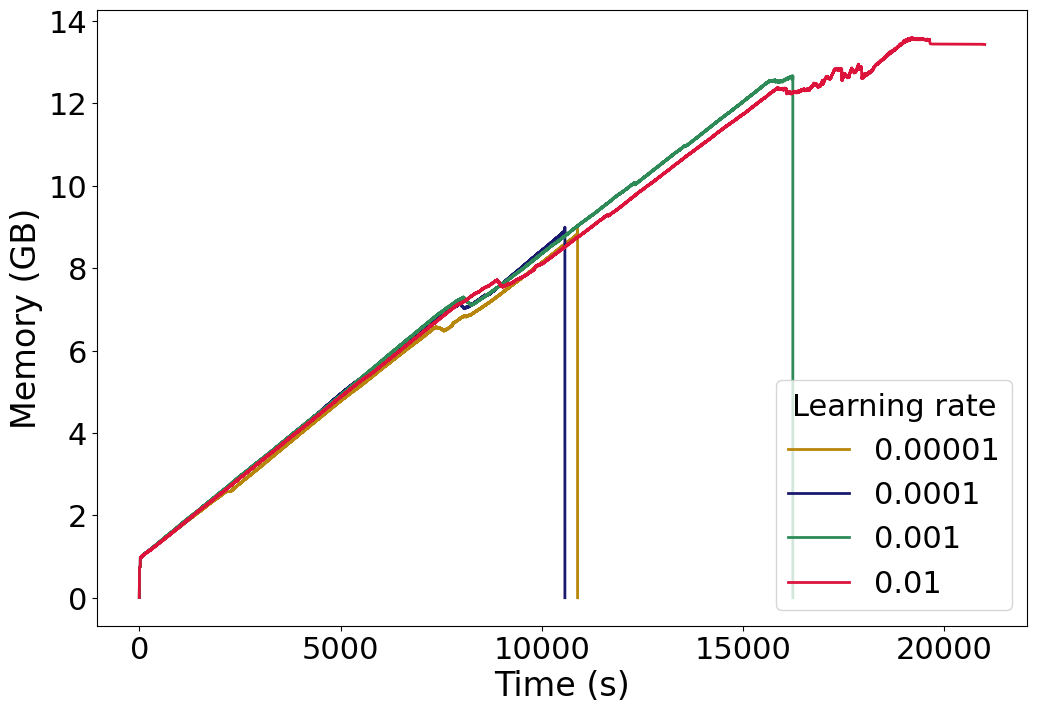

In [76]:
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
labels = ['0.00001', '0.0001', '0.001', '0.01']

plt.figure(figsize=(12, 8))
for i, frame in enumerate(df_list):
    plt.plot(frame['time'], frame['memory'], color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='lower right', title='Learning rate', title_fontsize=22)
plt.show()

In [77]:
max_values = [frame['memory'].max() for frame in df_list]
max_time = [round(frame['time'].max(), 0) for frame in df_list]
learning_rates = [0.00001, 0.0001, 0.001, 0.01]

In [78]:
df = pd.DataFrame({'learning_rate': learning_rates, 'max_memory': max_values, 'max_time': max_time})

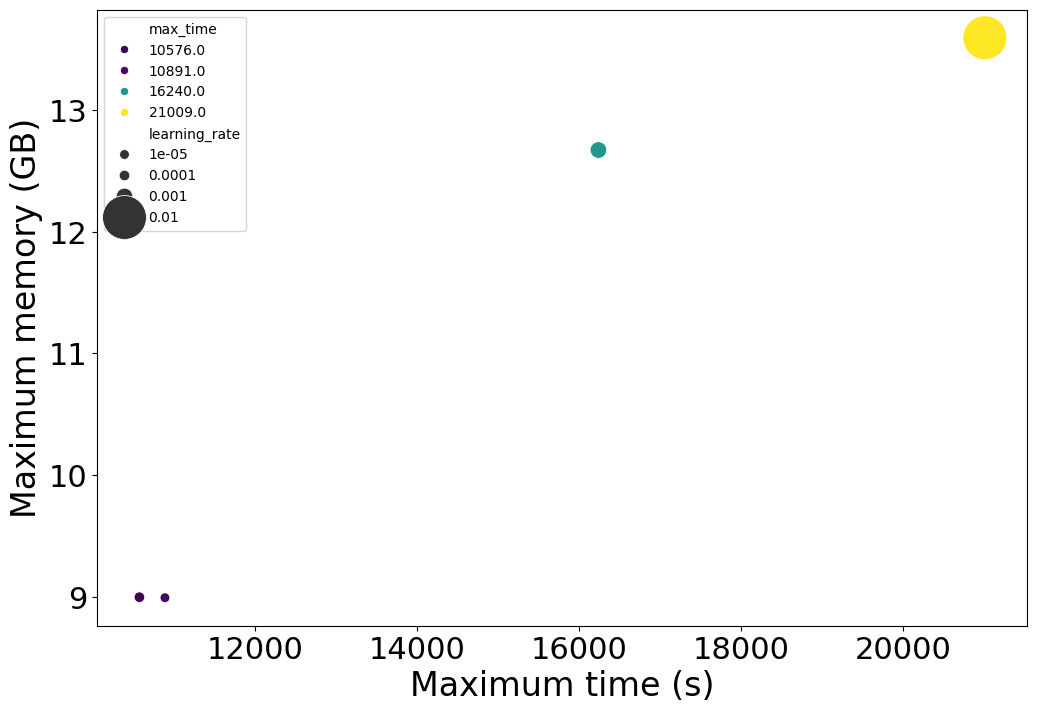

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='max_time', y='max_memory', 
                hue='max_time', size='learning_rate',
                sizes=(50, 1000), palette='viridis')
# sns.barplot(data=df, x='learning_rate', y='max_memory', palette='viridis')

# Set labels and title
plt.ylabel('Maximum memory (GB)', fontsize=24)
plt.xlabel('Maximum time (s)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.legend(fontsize=20, loc='upper left')

# Show the plot
plt.show()

### Gas weight

In [80]:
path_5 = r"/home/docker/car_racing/models/DQN/DQN_7"
path_6 = r"/home/docker/car_racing/models/DQN/DQN_8"

In [81]:
file_gas2 = os.path.join(path_5, "mprofile_20240331155744.dat")
file_gas1 = os.path.join(path_6, "mprofile_20240401073108.dat")

In [82]:
df_gas2 = pd.read_csv(file_gas2, sep=' ', header=0)
df_gas1 = pd.read_csv(file_gas1, sep=' ', header=0)

In [83]:
df_list = [df_gas1, df_gas2]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

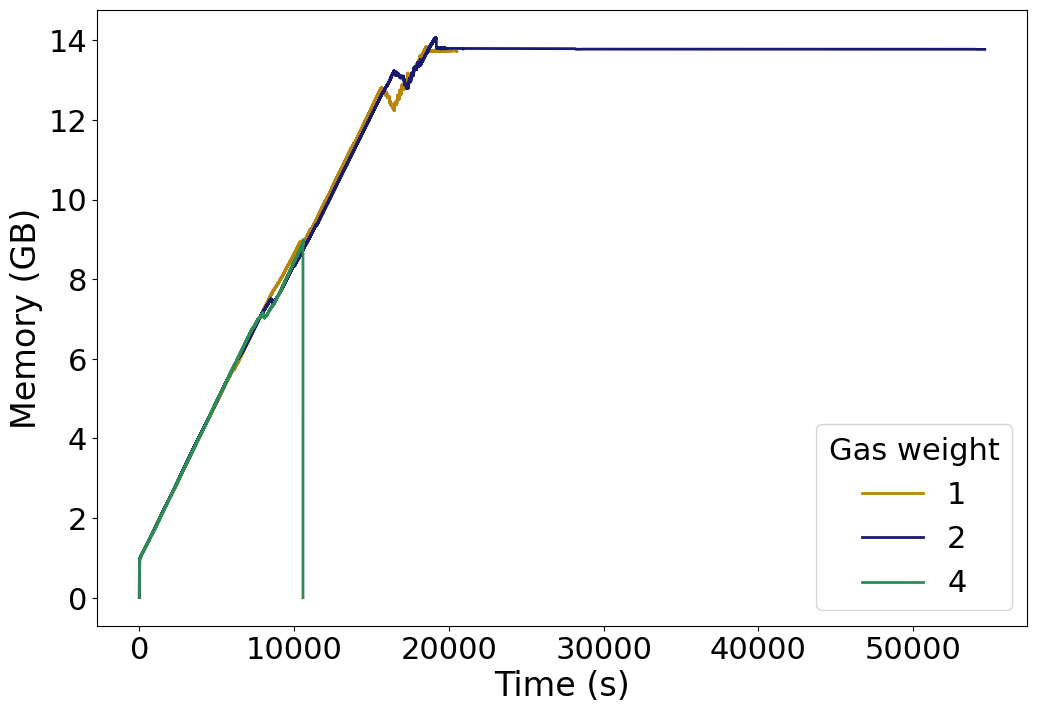

In [86]:
df_list = [df_gas1, df_gas2, df_0001]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
labels = ['1', '2', '4']

plt.figure(figsize=(12, 8))
for i, frame in enumerate(df_list):
    plt.plot(frame['time'], frame['memory'], color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='lower right', title='Gas weight', title_fontsize=22)
plt.show()

In [87]:
max_values_gw = [frame['memory'].max() for frame in df_list]
max_time_gw = [round(frame['time'].max(), 0) for frame in df_list]
gas_weights = [1, 2, 4]

In [88]:
df_gw = pd.DataFrame({'gas_weights': gas_weights, 'max_memory': max_values_gw, 'max_time': max_time_gw})

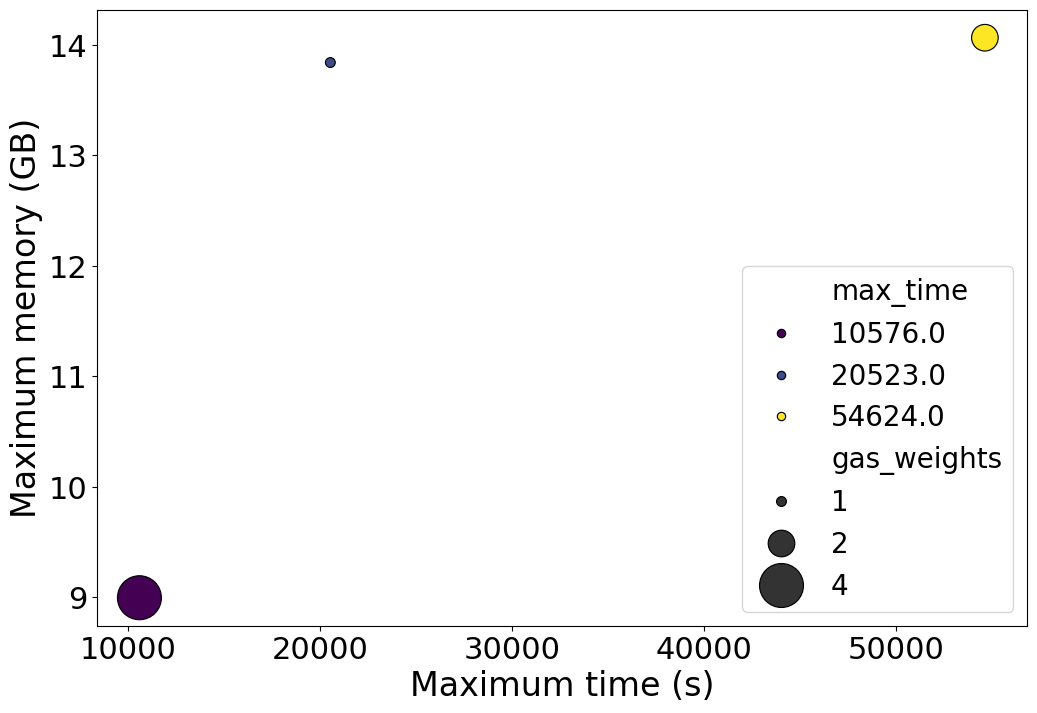

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_gw, x='max_time', y='max_memory', 
                hue='max_time', size='gas_weights', edgecolor='black',
                sizes=(50, 1000), palette='viridis')
# sns.barplot(data=df, x='learning_rate', y='max_memory', palette='viridis')

# Set labels and title
plt.ylabel('Maximum memory (GB)', fontsize=24)
plt.xlabel('Maximum time (s)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='lower right')

# Show the plot
plt.show()

### PPO algorithm

In [177]:
path_11 = r"/home/docker/car_racing/models/PPO_2"
path_12 = r"/home/docker/car_racing/models/PPO_4"
path_13 = r"/home/docker/car_racing/models/PPO_5"

In [186]:
file_ppo2 = os.path.join(path_11, "mprofile_20240331154200.dat")
file_ppo4 = os.path.join(path_12, "mprofile_20240402160020.dat")
file_ppo5 = os.path.join(path_13, "mprofile_20240403170715.dat")

In [187]:
df_ppo2 = pd.read_csv(file_ppo2, sep=' ', header=0)
df_ppo4 = pd.read_csv(file_ppo4, sep=' ', header=0)
df_ppo5 = pd.read_csv(file_ppo5, sep=' ', header=0)

In [188]:
df_list = [df_ppo2, df_ppo4, df_ppo5]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

In [189]:
max_values_ppo = [frame['memory'].max() for frame in df_list]
max_time_ppo = [round(frame['time'].max(), 0) for frame in df_list]

In [190]:
df_ppos = pd.DataFrame({'max_memory': max_values_ppo, 'max_time': max_time_ppo})

### QDQN

In [218]:
path_14 = r"/home/docker/car_racing/models/QDQN_1"
path_15 = r"/home/docker/car_racing/models/QDQN_2"
path_16 = r"/home/docker/car_racing/models/QDQN_4"
path_17 = r"/home/docker/car_racing/models/QDQN_5"

In [219]:
file_qdqn1 = os.path.join(path_14, "mprofile_20240406180628.dat")
file_qdqn2 = os.path.join(path_15, "mprofile_20240410163130.dat")
file_qdqn4 = os.path.join(path_16, "mprofile_20240421091052.dat")
file_qdqn5 = os.path.join(path_17, "mprofile_20240420094620.dat")

In [220]:
df_qdqn1 = pd.read_csv(file_qdqn1, sep=' ', header=0)
df_qdqn2 = pd.read_csv(file_qdqn2, sep=' ', header=0)
df_qdqn4 = pd.read_csv(file_qdqn4, sep=' ', header=0)
df_qdqn5 = pd.read_csv(file_qdqn5, sep=' ', header=0)

In [221]:
df_list = [df_qdqn1, df_qdqn2, df_qdqn4, df_qdqn5]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

In [222]:
max_values_qdqn = [frame['memory'].max() for frame in df_list]
max_time_qdqn = [round(frame['time'].max(), 0) for frame in df_list]

### DQN vs Dueling DQN vs PPO

In [90]:
path_7 = r"/home/docker/car_racing/models/DuelingDQN_7"
path_8 = r"/home/docker/car_racing/models/PPO_12"
path_9 = r"/home/docker/car_racing/models/QDQN_3"

In [91]:
file_dueling = os.path.join(path_7, "mprofile_20240321062108.dat")
file_ppo = os.path.join(path_8, "mprofile_20240406180628.dat")
file_qdqn = os.path.join(path_9, "mprofile_20240413133838.dat")

In [92]:
df_dueling = pd.read_csv(file_dueling, sep=' ', header=0)
df_ppo = pd.read_csv(file_ppo, sep=' ', header=0)
df_qdqn = pd.read_csv(file_qdqn, sep=' ', header=0)

In [ ]:
df_list = [df_dueling, df_ppo, df_qdqn]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

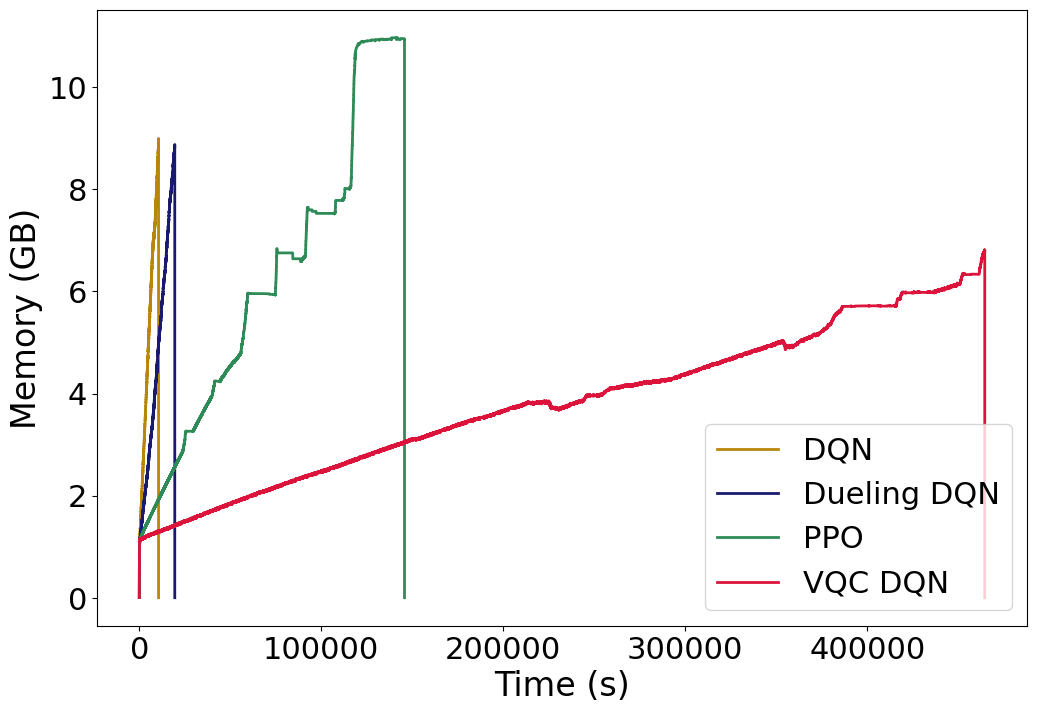

In [96]:
df_list = [df_0001, df_dueling, df_ppo, df_qdqn]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
labels = ['DQN', 'Dueling DQN', 'PPO', 'VQC DQN']

plt.figure(figsize=(12, 8))
for i, frame in enumerate(df_list):
    plt.plot(frame['time'], frame['memory'], color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='lower right')
plt.show()

In [97]:
max_values_algo = [frame['memory'].max() for frame in df_list]
max_time_algo = [round(frame['time'].max(), 0) for frame in df_list]
algorithms = ['DQN', 'Dueling DQN', 'PPO', 'VQC DQN']

In [98]:
df_algo = pd.DataFrame({'algorithms': algorithms, 'max_memory': max_values_algo, 'max_time': max_time_algo})

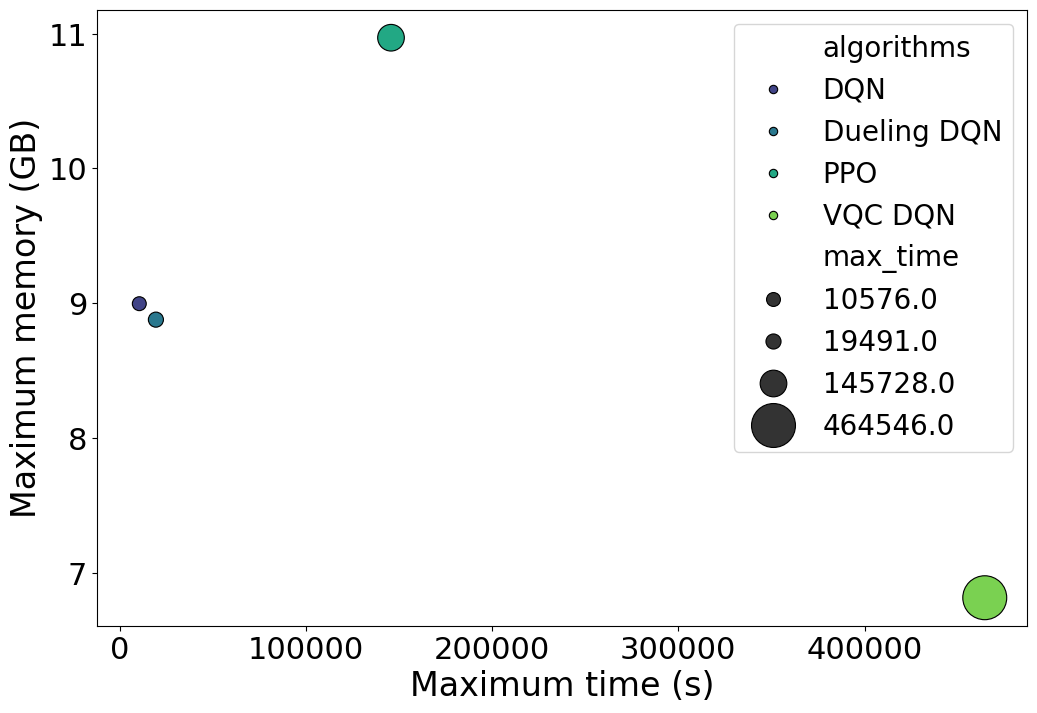

In [101]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_algo, x='max_time', y='max_memory', 
                hue='algorithms', size='max_time', edgecolor='black',
                sizes=(100, 1000), palette='viridis')
# sns.barplot(data=df, x='learning_rate', y='max_memory', palette='viridis')

# Set labels and title
plt.ylabel('Maximum memory (GB)', fontsize=24)
plt.xlabel('Maximum time (s)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper right')

# Show the plot
plt.show()

### Comparing QDQN

In [237]:
df_list = [df_qdqn2, df_qdqn, df_qdqn5]

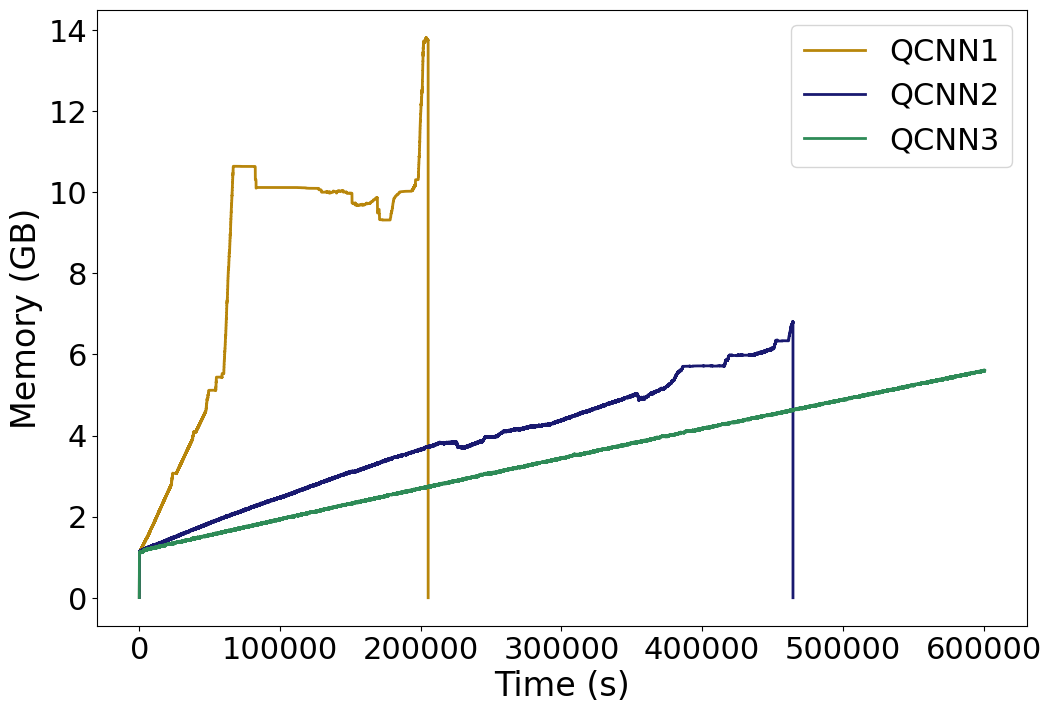

In [243]:
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
labels = ['QCNN1', 'QCNN2', 'QCNN3']

plt.figure(figsize=(12, 8))
for i, frame in enumerate(df_list):
    plt.plot(frame['time'], frame['memory'], color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.show()

In [238]:
max_values_qdqn = [frame['memory'].max() for frame in df_list]
max_time_qdqn = [round(frame['time'].max(), 0) for frame in df_list]
architecture = ['QCNN1', 'QCNN2', 'QCNN3']

In [240]:
df_qdqn_mem = pd.DataFrame({'architecture': architecture, 'max_memory': max_values_qdqn, 'max_time': max_time_qdqn})

# Carbon Emissions

### Learning rate

In [112]:
carbon_emissions = [0.32, 0.32, 0.49, 0.63]

In [113]:
df_lr = pd.DataFrame({'learning_rate': learning_rates, 'max_memory': max_values, 'max_time': max_time, 'carbon_emissions': carbon_emissions})

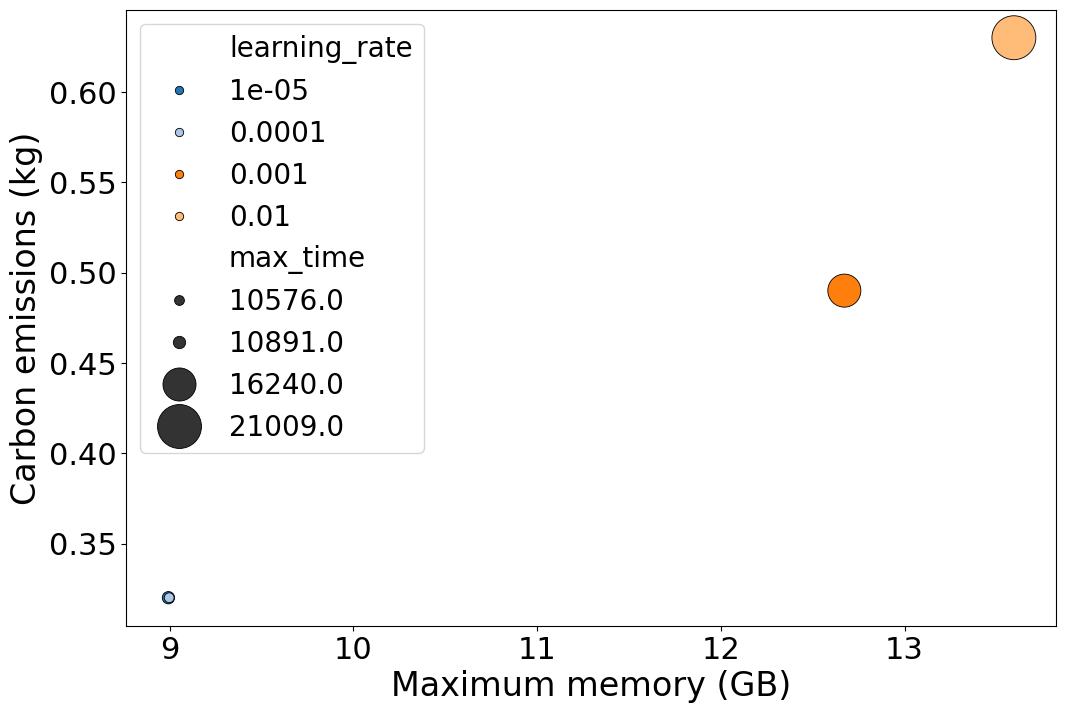

In [114]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df_lr, x='max_memory', y='carbon_emissions', 
                hue='learning_rate', size='max_time',
                sizes=(50, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum memory (GB)', fontsize=24)
plt.ylabel('Carbon emissions (kg)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper left')
plt.show()

### Gas weight

In [115]:
carbon_emissions = [0.62, 1.64, 0.32]

In [116]:
df_gw = pd.DataFrame({'gas_weight': gas_weights, 'max_memory': max_values_gw, 'max_time': max_time_gw, 'carbon_emissions': carbon_emissions})

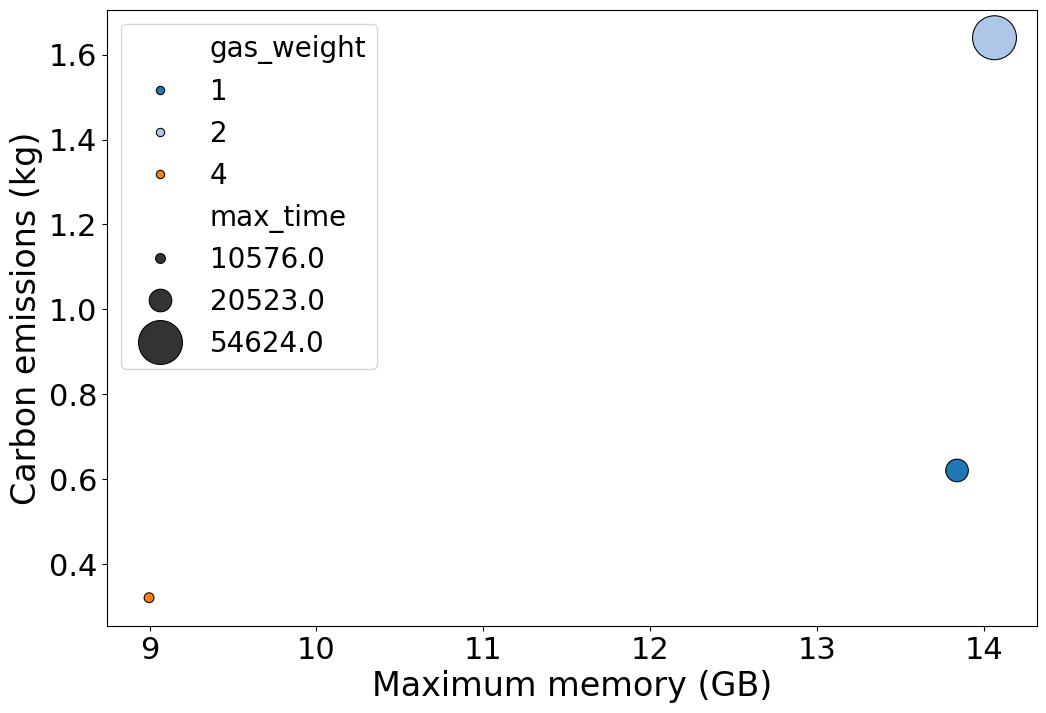

In [117]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df_gw, x='max_memory', y='carbon_emissions', 
                hue='gas_weight', size='max_time',
                sizes=(50, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum memory (GB)', fontsize=24)
plt.ylabel('Carbon emissions (kg)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper left')
plt.show()

### DQN vs Dueling DQN vs PPO vs Quantum DQN

In [118]:
carbon_emissions = [0.32, 0.58, 4.38, 13.93]

In [119]:
df_algo = pd.DataFrame({'algorithms': algorithms, 'max_memory': max_values_algo, 'max_time': max_time_algo, 'carbon_emissions': carbon_emissions})

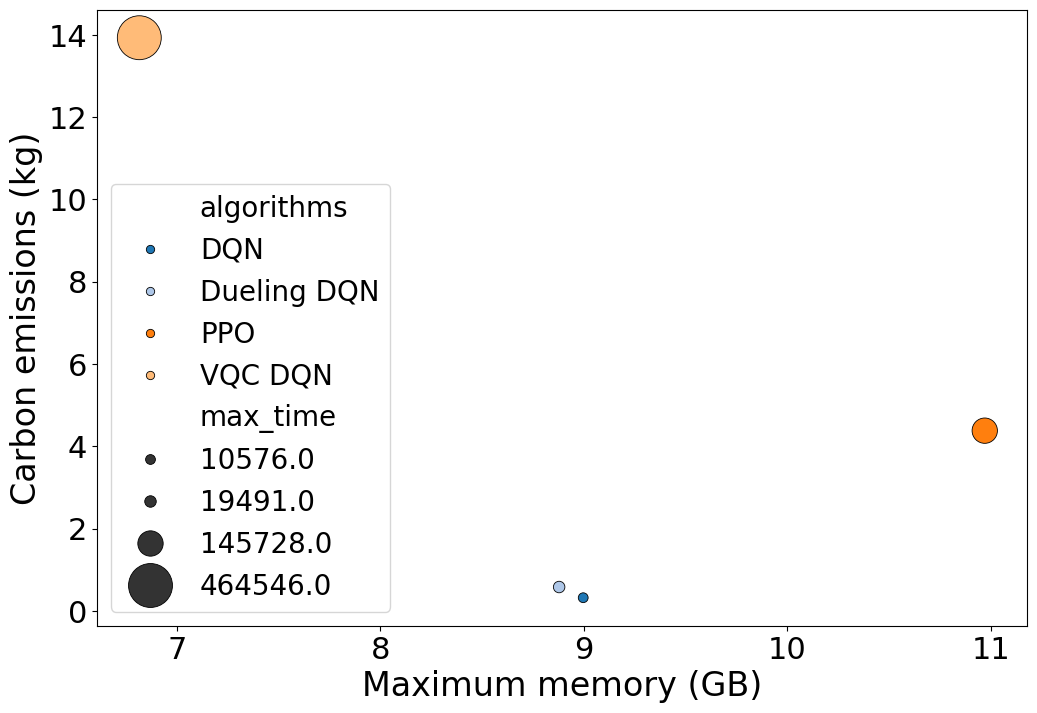

In [120]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df_algo, x='max_memory', y='carbon_emissions', 
                hue='algorithms', size='max_time',
                sizes=(50, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum memory (GB)', fontsize=24)
plt.ylabel('Carbon emissions (kg)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='lower left')
plt.show()

### PPO algorithm

In [193]:
carbon_emissions = [0.76, 0.84, 0.73]

In [194]:
df_ppos = pd.DataFrame({'max_memory': max_values_ppo, 'max_time': max_time_ppo, 'carbon_emissions': carbon_emissions})

In [195]:
df_ppos

,max_memory,max_time,carbon_emissions
0,13.745480,25173.0,0.76
1,14.314977,28088.0,0.84
2,11.898176,24348.0,0.73


### Quantum architecture

In [245]:
carbon_emissions = [6.16, 13.93, 18.04]

In [246]:
df_qdqn_co2 = pd.DataFrame({'architecture': architecture, 'max_memory': max_values_qdqn, 'max_time': max_time_qdqn, 'carbon_emissions': carbon_emissions})

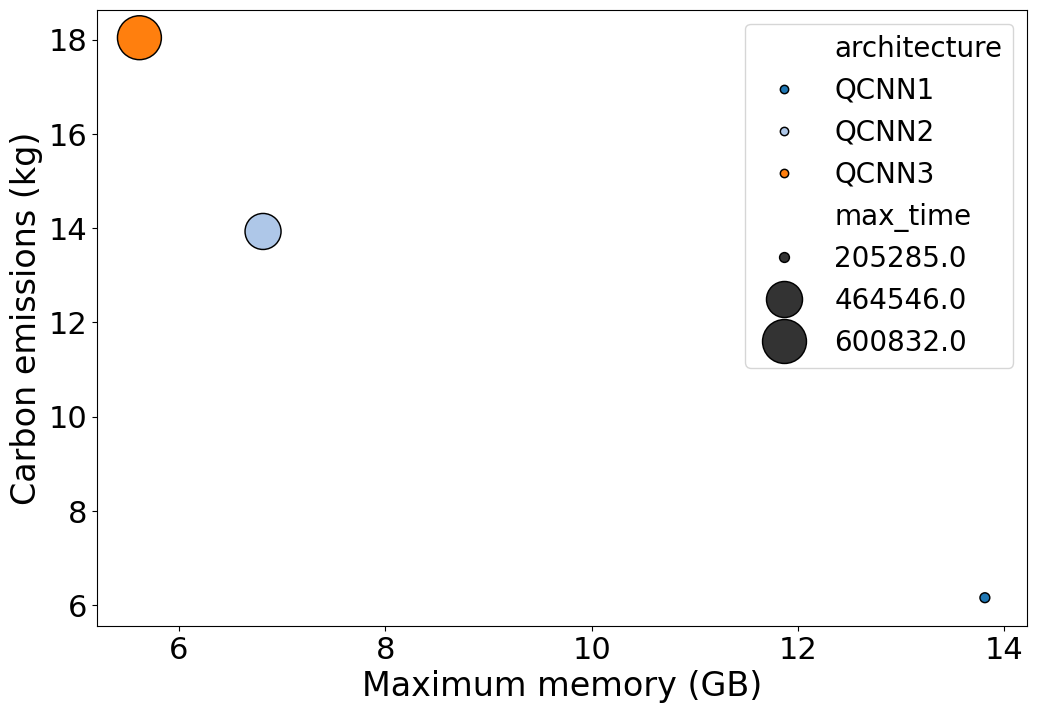

In [249]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df_qdqn_co2, x='max_memory', y='carbon_emissions', 
                hue='architecture', size='max_time',
                sizes=(50, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum memory (GB)', fontsize=24)
plt.ylabel('Carbon emissions (kg)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper right')
plt.show()

### QDQN

In [225]:
carbon_emissions = [4.37, 6.16, 6.1, 18.04]

In [226]:
df_qdqns = pd.DataFrame({'max_memory': max_values_qdqn, 'max_time': max_time_qdqn, 'carbon_emissions': carbon_emissions})

In [227]:
df_qdqns

,max_memory,max_time,carbon_emissions
0,10.970355,145728.0,4.37
1,13.810352,205285.0,6.16
2,5.117254,203376.0,6.10
3,5.616980,600832.0,18.04


### Correlation plot

In [228]:
df_lr['algorithms'] = 'DQN'
df_gw['algorithms'] = 'DQN'
df_ppos['algorithms'] = 'PPO'
df_qdqns['algorithms'] = 'VQC DQN'

In [229]:
df = pd.concat([df_lr, df_gw, df_algo, df_ppos, df_qdqns], axis=0)

In [230]:
df = df.drop(columns=['learning_rate', 'gas_weight'])

In [231]:
df.reset_index(inplace=True, drop=True)

In [232]:
df

,max_memory,max_time,carbon_emissions,algorithms
0,8.992551,10891.0,0.32,DQN
1,8.996805,10576.0,0.32,DQN
2,12.672426,16240.0,0.49,DQN
3,13.595457,21009.0,0.63,DQN
4,13.839090,20523.0,0.62,DQN
5,14.063586,54624.0,1.64,DQN
6,8.996805,10576.0,0.32,DQN
7,8.996805,10576.0,0.32,DQN
8,8.878465,19491.0,0.58,Dueling DQN
9,10.970355,145728.0,4.38,PPO


In [233]:
# Rename the df columns
df = df.rename(columns={'max_memory': 'Memory (GB)', 'max_time': 'Time (s)', 'carbon_emissions': 'Carbon emissions (kg)'})

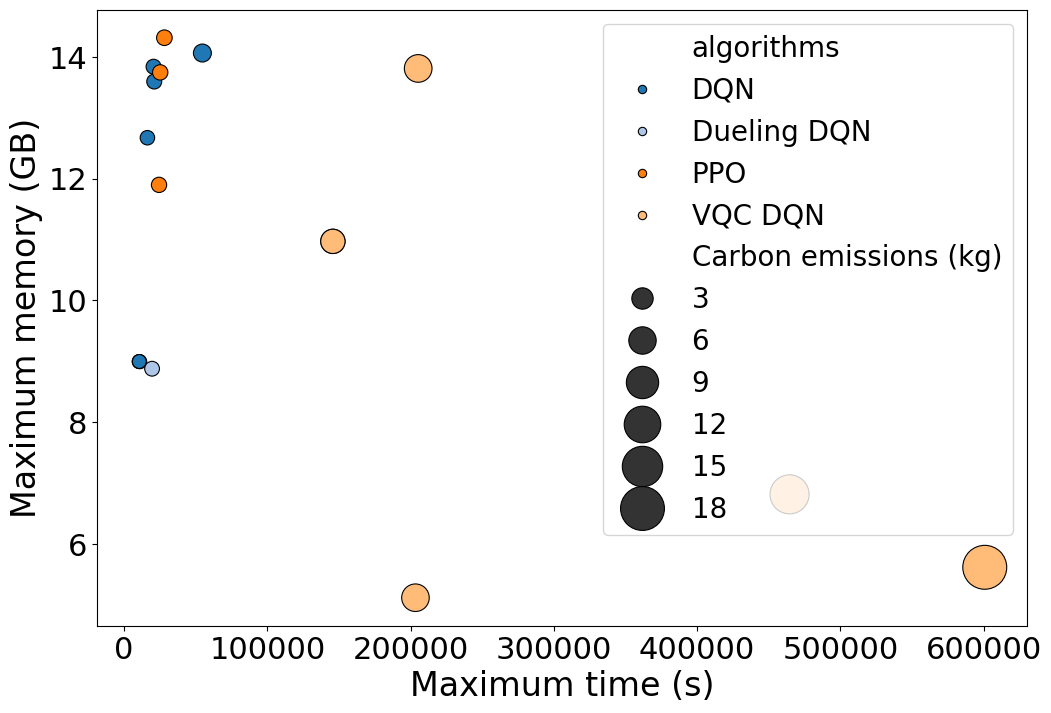

In [234]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df, x='Time (s)', y='Memory (GB)', 
                size='Carbon emissions (kg)', hue='algorithms',
                sizes=(100, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum time (s)', fontsize=24)
plt.ylabel('Maximum memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper right')
plt.show()

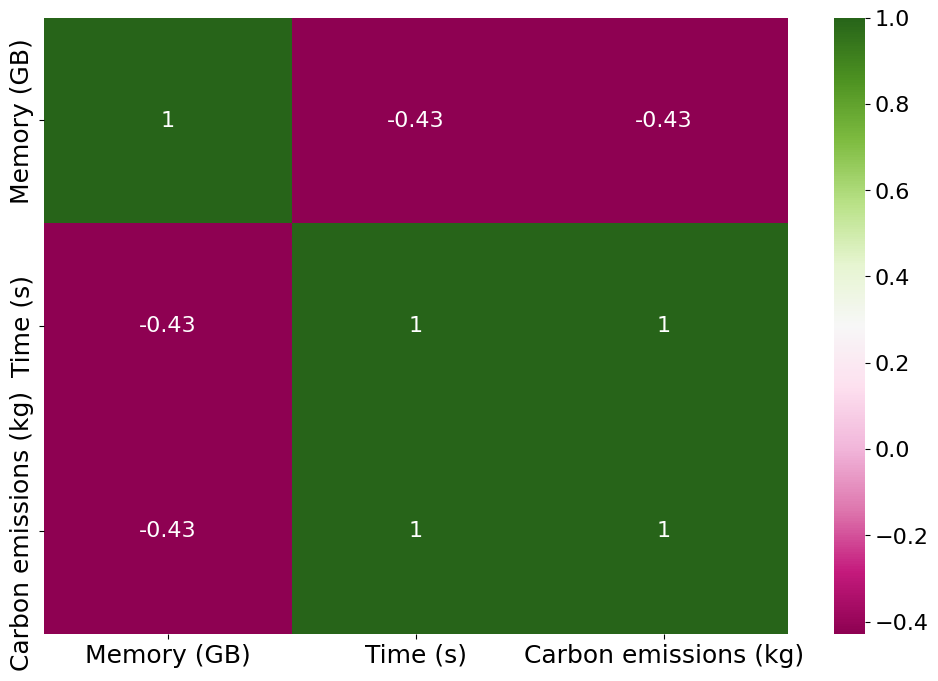

In [161]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='PiYG', annot_kws={'size': 16})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
plt.show()